# HW#00: MLP function approximation
### CE397 and CSE393: Scientific Machine Learning
#### Qianqian Tong, qt737

## 1 Theoretical Foundations
### 1.1 The Universal Approximation Theorem (UAT)

**a)** The UAT is to use a single hidden layer neural network to recognize and approximate the pattern of a continuous function. In details, a forward neural network with a single hidden layer and a non-polynomial/parabola activation function (e.g., sigmoid or ReLU) can approximate any continuous function on a compact domain to arbitrary accuracy.

**b)** The UAT guarantees that single-hidden-layer neural networks can approximate any continuous and smooth function arbitrarily well. However, it only guarantees an existence, not constructive and does not specify the required number of neurons, how to find the weights and biases, or whether efficiently trained given finite resources.


### 1.2 Backpropagation for a Two-Layer MLP
Consider the model:
- Input: $x$
- Hidden layer: $z_i = w^{(1)}_i x + b^{(1)}_i,\; a_i = \sigma(z_i)$
- Output: $\hat y = \mathbf{w}^{(2)\top}\mathbf{a} + b^{(2)}$
- Loss: $L = (\hat y - y)^2$

Expand the partial derivative according to the chain rule:
#### 1. Loss Gradient
$$
\frac{\partial L}{\partial \hat y} = 2(\hat y - y)
$$

#### 2. Output Layer Gradients
$$
\frac{\partial L}{\partial w^{(2)}_i} = 2(\hat y - y)\, a_i
$$

$$
\frac{\partial L}{\partial b^{(2)}} = 2(\hat y - y)
$$

#### 3. Hidden Layer Error Term
$$
\frac{\partial L}{\partial z_i}
= 2(\hat y - y)\, w^{(2)}_i \,\sigma'(z_i)
$$

where $\sigma'(z_i) = \sigma(z_i)(1-\sigma(z_i))$.

#### 4. Hidden Layer Parameter Gradients
$$
\frac{\partial L}{\partial w^{(1)}_i} = 2(\hat y - y)\, w^{(2)}_i\, \sigma'(z_i)\, x
$$

$$
\frac{\partial L}{\partial b^{(1)}_i} = 2(\hat y - y)\, w^{(2)}_i\, \sigma'(z_i)
$$

where $\sigma'(z_i) = \sigma(z_i)(1-\sigma(z_i))$.

## 2 Computational Experiments: Function Approximation

### 2.1 Approximating a Discontinuous Function


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Training data
x = np.linspace(0, 1, 200).reshape(-1, 1)
y = (x >= 0.5).astype(np.float32)

x_train = torch.tensor(x, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32)

# a single hidden layer MLP with 50 neurons and a ‘tanh‘ activation
class MLP(nn.Module):
    def __init__(self, hidden_size=50, activation=nn.Tanh()):
        super().__init__()
        self.fc1 = nn.Linear(1, hidden_size)
        self.act = activation
        self.fc2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        return self.fc2(self.act(self.fc1(x)))

model = MLP(hidden_size=50, activation=nn.Tanh())
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(2000):
    optimizer.zero_grad()
    output = model(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

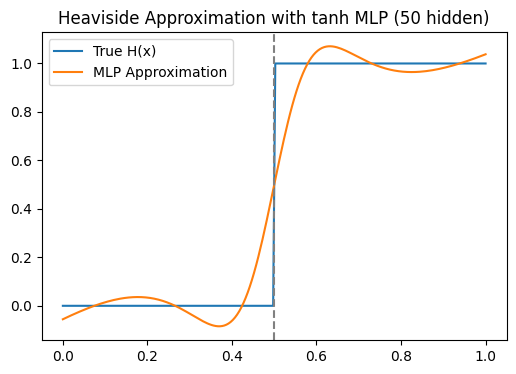

Final loss: 0.010512582026422024


In [6]:
# Plot the learned function u(x) against the true function
with torch.no_grad():
    y_pred = model(x_train).numpy()

plt.figure(figsize=(6,4))
plt.plot(x, y, label="True H(x)")
plt.plot(x, y_pred, label="MLP Approximation")
plt.axvline(0.5, color="gray", linestyle="--")
plt.legend()
plt.title("Heaviside Approximation with tanh MLP (50 hidden)")
plt.show()
print("Final loss:", loss.item())

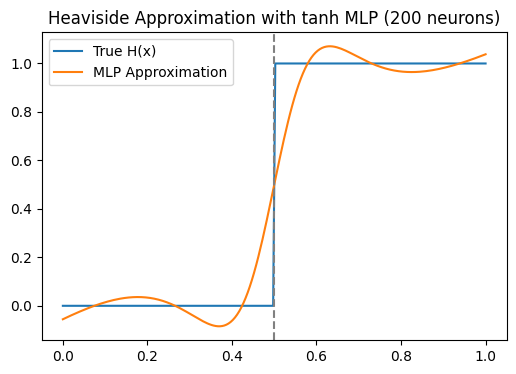

Final loss: 0.009883368387818336


In [7]:
# Increase hidden layer width (200 neurons)
model_wide = MLP(hidden_size=200, activation=nn.Tanh())
optimizer = optim.Adam(model_wide.parameters(), lr=0.01)
for epoch in range(2000):
    optimizer.zero_grad()
    output = model_wide(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

plt.figure(figsize=(6,4))
plt.plot(x, y, label="True H(x)")
plt.plot(x, y_pred, label="MLP Approximation")
plt.axvline(0.5, color="gray", linestyle="--")
plt.legend()
plt.title("Heaviside Approximation with tanh MLP (200 neurons)")
plt.show()
print("Final loss:", loss.item())

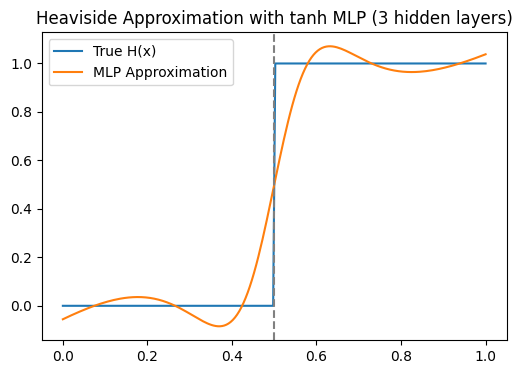

Final loss: 4.3211224692640826e-05


In [8]:
# Increase depth (3 hidden layers)
class DeepMLP(nn.Module):
    def __init__(self, hidden_size=50, depth=3, activation=nn.Tanh()):
        super().__init__()
        layers = []
        layers.append(nn.Linear(1, hidden_size))
        layers.append(activation)
        for _ in range(depth-1):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(activation)
        layers.append(nn.Linear(hidden_size, 1))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

model_deep = DeepMLP(hidden_size=50, depth=3, activation=nn.Tanh())
optimizer = optim.Adam(model_deep.parameters(), lr=0.01)
for epoch in range(2000):
    optimizer.zero_grad()
    output = model_deep(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

plt.figure(figsize=(6,4))
plt.plot(x, y, label="True H(x)")
plt.plot(x, y_pred, label="MLP Approximation")
plt.axvline(0.5, color="gray", linestyle="--")
plt.legend()
plt.title("Heaviside Approximation with tanh MLP (3 hidden layers)")
plt.show()
print("Final loss:", loss.item())

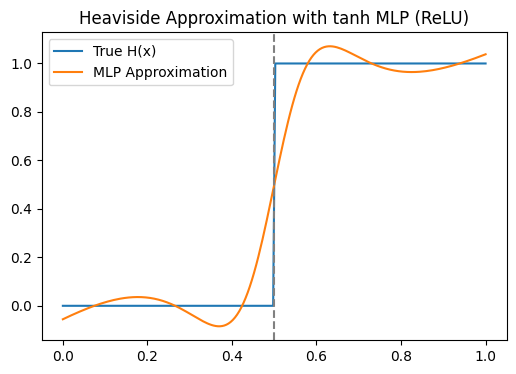

Final loss: 0.005920669063925743


In [11]:
# Changing the activation function to ReLU
model_relu = MLP(hidden_size=50, activation=nn.ReLU())
optimizer = optim.Adam(model_relu.parameters(), lr=0.01)
for epoch in range(2000):
    optimizer.zero_grad()
    output = model_relu(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

plt.figure(figsize=(6,4))
plt.plot(x, y, label="True H(x)")
plt.plot(x, y_pred, label="MLP Approximation")
plt.axvline(0.5, color="gray", linestyle="--")
plt.legend()
plt.title("Heaviside Approximation with tanh MLP (ReLU)")
plt.show()
print("Final loss:", loss.item())

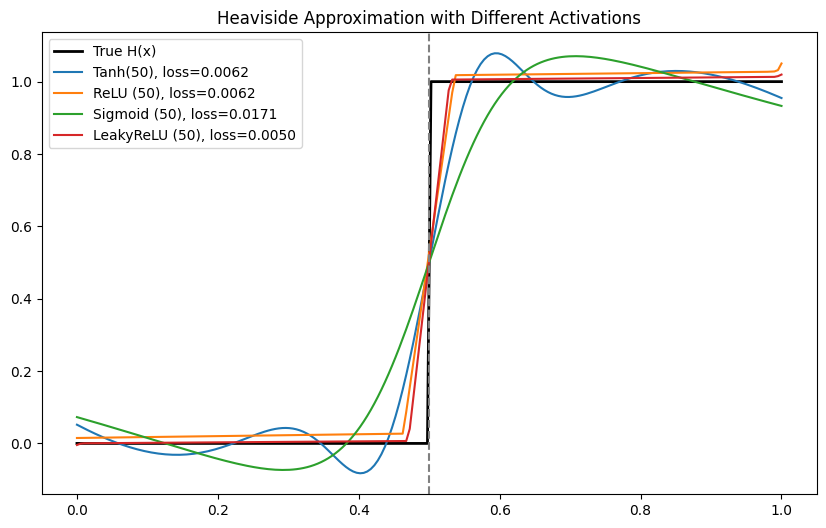

In [17]:
# Try different loss functions
def train_model(model, x_train, y_train, epochs=2000, lr=0.01):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(x_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()
    return model, loss.item()

model_tanh, loss_tanh = train_model(MLP(hidden_size=50, activation=nn.Tanh()), x_train, y_train)
# model_wide, loss_wide = train_model(MLP(hidden_size=200, activation=nn.Tanh()), x_train, y_train)
# model_deep, loss_deep = train_model(DeepMLP(hidden_size=50, depth=3, activation=nn.Tanh()), x_train, y_train)
model_relu, loss_relu = train_model(MLP(hidden_size=50, activation=nn.ReLU()), x_train, y_train)
model_sigmoid, loss_sigmoid = train_model(MLP(hidden_size=50, activation=nn.Sigmoid()), x_train, y_train)
model_leakyrelu, loss_leakyrelu = train_model(MLP(hidden_size=50, activation=nn.LeakyReLU()), x_train, y_train)

with torch.no_grad():
    # y_pred_wide = model_wide(x_train).numpy()
    # y_pred_deep = model_deep(x_train).numpy()
    y_pred_tanh = model_tanh(x_train).numpy()
    y_pred_relu = model_relu(x_train).numpy()
    y_pred_sigmoid = model_sigmoid(x_train).numpy()
    y_pred_leakyrelu = model_leakyrelu(x_train).numpy()

# Plot with losses in legend
plt.figure(figsize=(10,6))
plt.plot(x, y, label="True H(x)", linewidth=2, color="black")
# plt.plot(x, y_pred_wide, label=f"Wide tanh (200) [loss={loss_wide:.4f}]")
# plt.plot(x, y_pred_deep, label=f"Deep tanh (3x50) [loss={loss_deep:.4f}]")
plt.plot(x, y_pred_tanh, label=f"Tanh(50), loss={loss_relu:.4f}")
plt.plot(x, y_pred_relu, label=f"ReLU (50), loss={loss_relu:.4f}")
plt.plot(x, y_pred_sigmoid, label=f"Sigmoid (50), loss={loss_sigmoid:.4f}")
plt.plot(x, y_pred_leakyrelu, label=f"LeakyReLU (50), loss={loss_leakyrelu:.4f}")
plt.axvline(0.5, color="gray", linestyle="--")
plt.legend()
plt.title("Heaviside Approximation with Different Activations")
plt.show()

**Analysis:**
The figure shows that tanh and sigmoid networks smooth out the discontinuity at $x=0.5$ and even overshoot, since compositions of these activations are smooth ($C^\infty$) and cannot model sharp jumps. In contrast, ReLU and especially LeakyReLU approximate the step more sharply with lower loss, because their piecewise linear nature matches the structure of the target function.

### 2.2 Comparing Activation Functions & Optimizers


Final loss for Sigmoid: 0.0002
Final loss for Tanh: 0.0001
Final loss for ReLU: 0.0003
Final loss for LeakyReLU: 0.0002
Final loss for SiLU: 0.0017


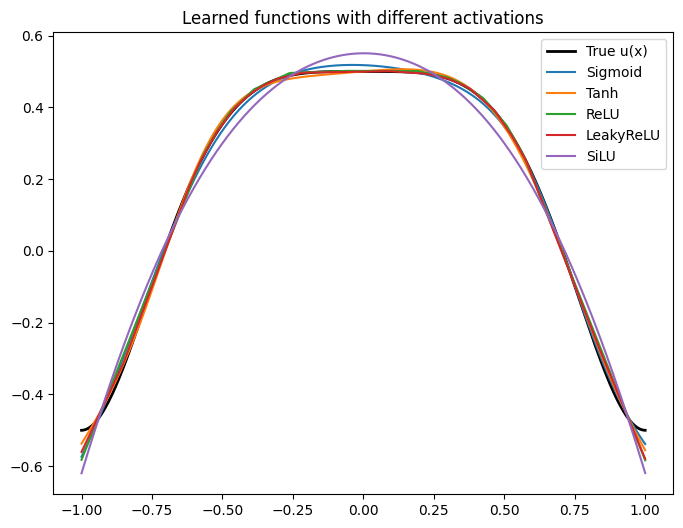

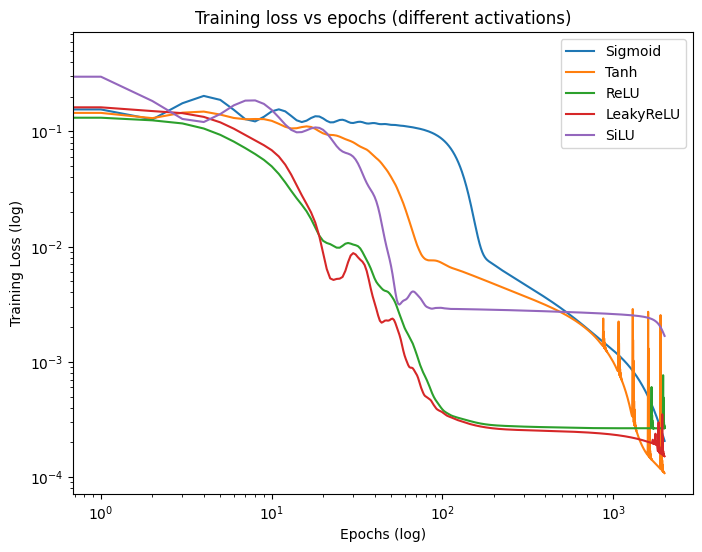

In [20]:
x = np.linspace(-1, 1, 500).reshape(-1, 1).astype(np.float32)
y = 0.5 * np.cos(np.pi * x**2).astype(np.float32)   # u(x) = 0.5 cos(pi x^2)

x_train = torch.tensor(x)
y_train = torch.tensor(y)

class MLP(nn.Module):
    def __init__(self, hidden_size=50, activation=nn.Tanh()):
        super().__init__()
        self.fc1 = nn.Linear(1, hidden_size)
        self.act = activation
        self.fc2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        return self.fc2(self.act(self.fc1(x)))

def train_model(model, optimizer, epochs=2000):
    criterion = nn.MSELoss()
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(x_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    print(f"Final loss for {name}: {losses[-1]:.4f}")
    return model, losses

# (a) Compare activation functions
activations = {
    "Sigmoid": nn.Sigmoid(),
    "Tanh": nn.Tanh(),
    "ReLU": nn.ReLU(),
    "LeakyReLU": nn.LeakyReLU(),
    "SiLU": nn.SiLU()
}

results_act = {}
for name, act in activations.items():
    model = MLP(hidden_size=50, activation=act)
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    model, losses = train_model(model, optimizer, epochs=2000)
    with torch.no_grad():
        y_pred = model(x_train).numpy()
    results_act[name] = (y_pred, losses)

# Plot learned functions
plt.figure(figsize=(8,6))
plt.plot(x, y, label="True u(x)", linewidth=2, color="black")
for name, (y_pred, _) in results_act.items():
    plt.plot(x, y_pred, label=name)
plt.legend()
plt.title("Learned functions with different activations")
plt.show()

# Plot training loss (log-log)
plt.figure(figsize=(8,6))
for name, (_, losses) in results_act.items():
    plt.plot(range(len(losses)), losses, label=f"{name}")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Epochs (log)")
plt.ylabel("Training Loss (log)")
plt.legend()
plt.title("Training loss vs epochs (different activations)")
plt.show()

Final loss for SGD-momentum: 0.0040
Final loss for RMSprop: 0.0128
Final loss for Adam: 0.0001


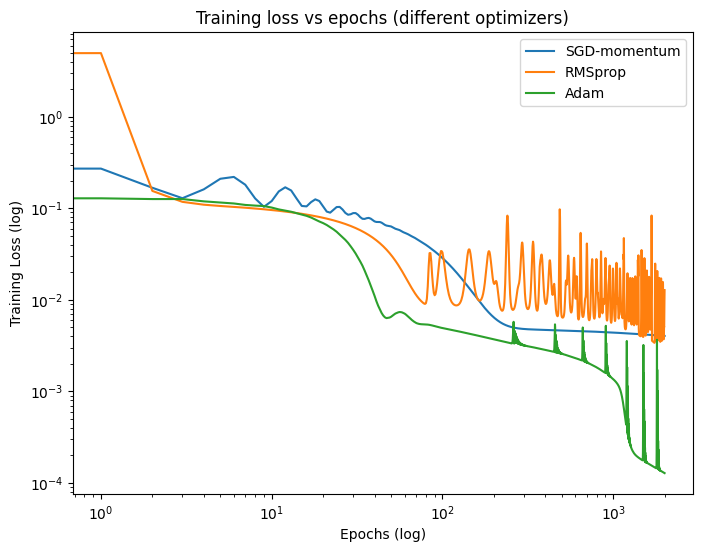

In [21]:
# (b) Compare optimizers
best_act = nn.Tanh()

optimizers = {
    "SGD-momentum": lambda params: optim.SGD(params, lr=0.01, momentum=0.9),
    "RMSprop": lambda params: optim.RMSprop(params, lr=0.01),
    "Adam": lambda params: optim.Adam(params, lr=0.01)
}

results_opt = {}
for name, opt_fn in optimizers.items():
    model = MLP(hidden_size=50, activation=best_act)
    optimizer = opt_fn(model.parameters())
    model, losses = train_model(model, optimizer, epochs=2000)
    results_opt[name] = losses

# Plot optimizer comparison
plt.figure(figsize=(8,6))
for name, losses in results_opt.items():
    plt.plot(range(len(losses)), losses, label=name)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Epochs (log)")
plt.ylabel("Training Loss (log)")
plt.legend()
plt.title("Training loss vs epochs (different optimizers)")
plt.show()


## 3 Compositional Learning

### 3.1 Learning and Composing Multi-Scale Functions

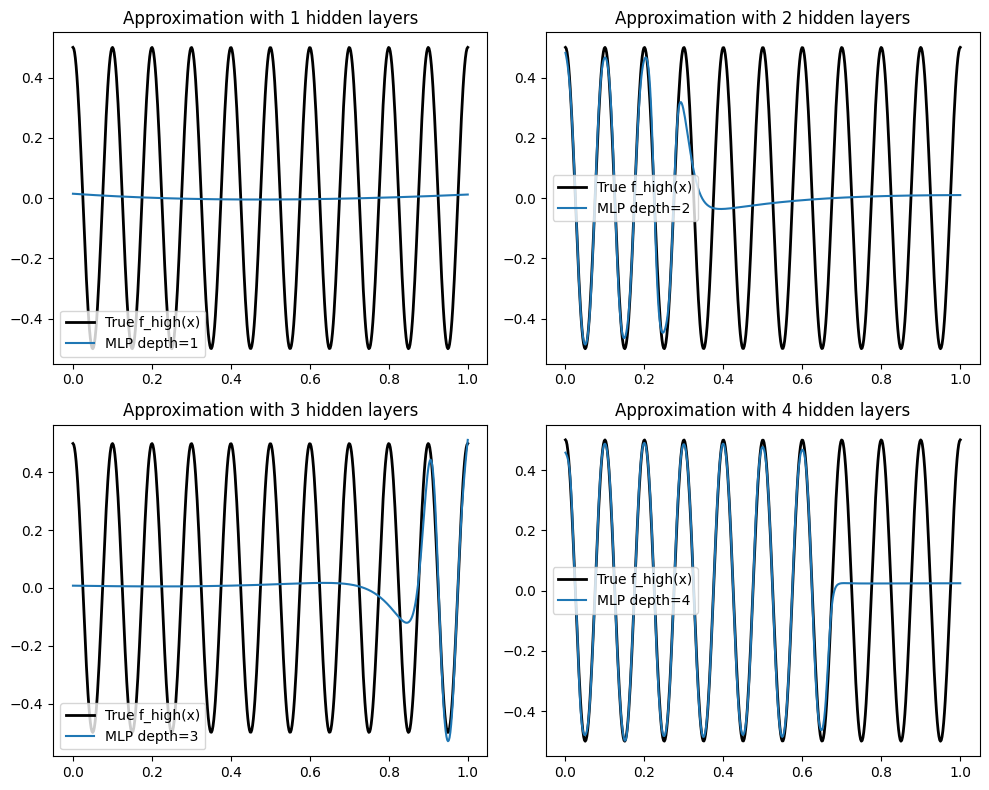

In [4]:
x = np.linspace(0, 1, 500).reshape(-1, 1).astype(np.float32)
y = 0.5 * np.cos(20 * np.pi * x).astype(np.float32) # f_high(x) = 0.5 cos(20πx)

x_train = torch.tensor(x)
y_train = torch.tensor(y)

class MLP(nn.Module):
    def __init__(self, hidden_size=50, depth=1, activation=nn.Tanh()):
        super().__init__()
        layers = []
        layers.append(nn.Linear(1, hidden_size))
        layers.append(activation)
        for _ in range(depth - 1):   # add (depth-1) hidden layers
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(activation)
        layers.append(nn.Linear(hidden_size, 1))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

def train_model(model, epochs=3000, lr=0.01):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(x_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return model, losses

depths = [1, 2, 3, 4]
results = {}

for d in depths:
    model = MLP(hidden_size=50, depth=d, activation=nn.Tanh())
    trained_model, losses = train_model(model)
    with torch.no_grad():
        y_pred = trained_model(x_train).numpy()
    results[d] = (y_pred, losses)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, d in enumerate(depths):
    axs[i].plot(x, y, label="True f_high(x)", linewidth=2, color="black")
    axs[i].plot(x, results[d][0], label=f"MLP depth={d}")
    axs[i].legend()
    axs[i].set_title(f"Approximation with {d} hidden layers")

plt.tight_layout()
plt.show()

Explanations to results above regarding spectral bias:
- **1 hidden layer:** The network outputs nearly zero, failing to capture oscillations.
- **2 hidden layers:** The network begins to approximate some oscillations, but only partially, and cannot generalize across the full input range.
- **3 & 4 hidden layers:** Although deeper networks should theoretically fit high-frequency signals better, the training dynamics still favor smooth solutions. Without sufficient depth, width, or specialized architectures, the network collapses toward flat or weak oscillations.


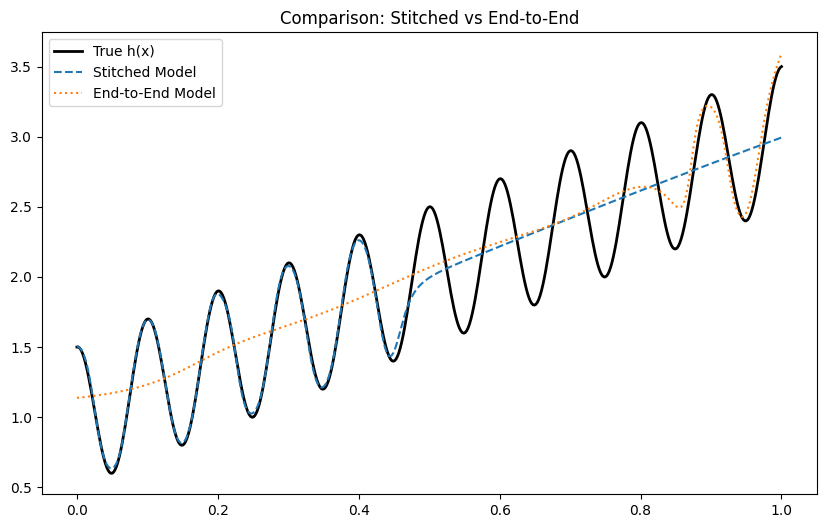

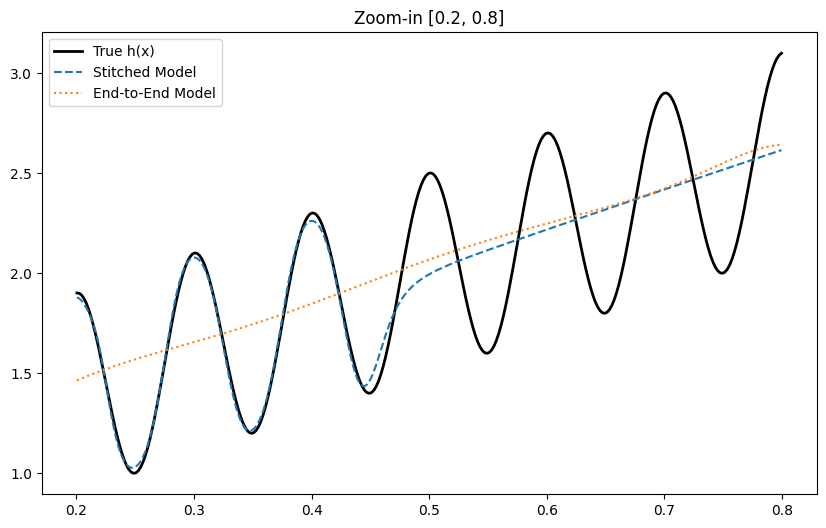

In [5]:
# Data: h(x) = f_linear(x) + f_high(x)
x = np.linspace(0, 1, 500).reshape(-1, 1).astype(np.float32)
f_linear = 1 + 2 * x
f_high = 0.5 * np.cos(20 * np.pi * x)
h = f_linear + f_high

x_train = torch.tensor(x)
y_linear = torch.tensor(f_linear)
y_high = torch.tensor(f_high)
y_total = torch.tensor(h)

# Define flexible MLP
class MLP(nn.Module):
    def __init__(self, hidden_size=50, depth=1, activation=nn.Tanh()):
        super().__init__()
        layers = []
        layers.append(nn.Linear(1, hidden_size))
        layers.append(activation)
        for _ in range(depth - 1):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(activation)
        layers.append(nn.Linear(hidden_size, 1))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

# Training function
def train_model(model, x_train, y_train, epochs=3000, lr=0.01):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(x_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()
    return model

# (a) Modular Training
# Shallow network for f_linear
net_linear = MLP(hidden_size=10, depth=1, activation=nn.Tanh())
net_linear = train_model(net_linear, x_train, y_linear)

# Deep network for f_high
net_high = MLP(hidden_size=50, depth=3, activation=nn.Tanh())
net_high = train_model(net_high, x_train, y_high)

# (b) Manual Composition
with torch.no_grad():
    y_pred_linear = net_linear(x_train).numpy()
    y_pred_high = net_high(x_train).numpy()
    y_pred_stitched = y_pred_linear + y_pred_high

# (c) End-to-End Training
net_end2end = MLP(hidden_size=50, depth=4, activation=nn.Tanh())
net_end2end = train_model(net_end2end, x_train, y_total)

with torch.no_grad():
    y_pred_end2end = net_end2end(x_train).numpy()

# Plot Comparison
plt.figure(figsize=(10,6))
plt.plot(x, h, label="True h(x)", linewidth=2, color="black")
plt.plot(x, y_pred_stitched, label="Stitched Model", linestyle="--")
plt.plot(x, y_pred_end2end, label="End-to-End Model", linestyle=":")
plt.legend()
plt.title("Comparison: Stitched vs End-to-End")
plt.show()

# Zoom-in [0.2, 0.8]
mask = (x.flatten() >= 0.2) & (x.flatten() <= 0.8)
plt.figure(figsize=(10,6))
plt.plot(x[mask], h[mask], label="True h(x)", linewidth=2, color="black")
plt.plot(x[mask], y_pred_stitched[mask], label="Stitched Model", linestyle="--")
plt.plot(x[mask], y_pred_end2end[mask], label="End-to-End Model", linestyle=":")
plt.legend()
plt.title("Zoom-in [0.2, 0.8]")
plt.show()

**Comparison & Analysis:**
The end-to-end approach is more effective in this case because joint training enables the network to balance the low and high frequency components, while the stitched approach is too rigid and underfits the composite signal.

## 4 Regularization in High-Dimensional Spaces

#### 4.1 L1 vs. L2 Regularization for Feature Selection

a) Function Approximation:

Q1: Describe the behavior of the model with no regularization.

A1: Without regularization, the model is possible to overfitting if the network gets deeper.

Q2: How do the L1 and L2 regularized models approximate the underlying true signal?

A2: L1 regularization promotes sparsity by driving many weights to zero, effectively performing feature selection.
L2 regularization prevents large coefficients by shrinking them toward zero, which acts like weight decay but generally keeps all features in the model.


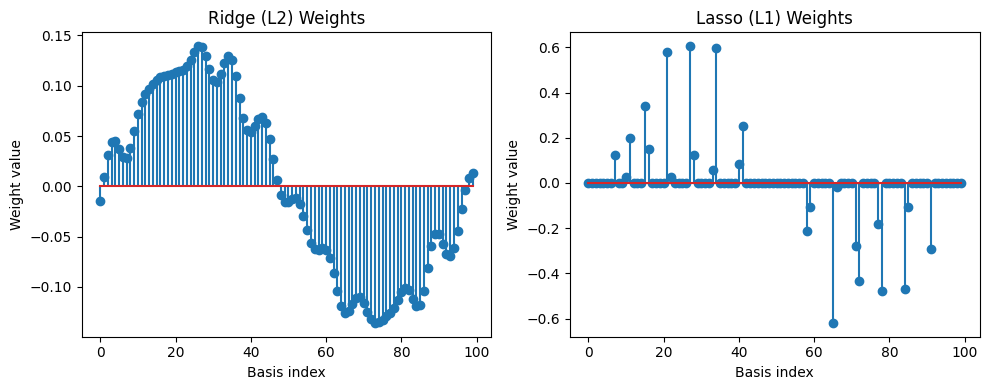

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso

np.random.seed(42)
N = 200
x = np.linspace(0, 2*np.pi, N).reshape(-1, 1)
y_true = np.sin(x)
y = y_true + 0.1 * np.random.randn(N, 1)    # y = sin(x) + noise

# RBF feature matrix (100 Gaussians)
def rbf_features(x, centers, gamma=0.5):
    Phi = np.exp(- (x - centers.T)**2 / (2 * gamma**2))
    return Phi

n_centers = 100
centers = np.linspace(0, 2*np.pi, n_centers).reshape(-1, 1)
Phi = rbf_features(x, centers, gamma=0.2)

ridge = Ridge(alpha=1.0, fit_intercept=False)
lasso = Lasso(alpha=0.01, fit_intercept=False, max_iter=10000)

ridge.fit(Phi, y)
lasso.fit(Phi, y)

w_ridge = ridge.coef_.flatten()
w_lasso = lasso.coef_.flatten()


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.stem(w_ridge)
plt.title("Ridge (L2) Weights")
plt.xlabel("Basis index")
plt.ylabel("Weight value")
plt.subplot(1,2,2)
plt.stem(w_lasso)
plt.title("Lasso (L1) Weights")
plt.xlabel("Basis index")
plt.ylabel("Weight value")

plt.tight_layout()
plt.show()

Sparsity means that many coefficients are exactly zero, so the model only uses a small subset of basis functions. In the plots, Ridge spreads small weights across all features, while Lasso drives most weights to zero, leaving only a few nonzero coefficients.